In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.head()

,Unnamed: 0,user_id,ts,gate_id
0,0,18,2022-07-29 09:08:54,7
1,1,18,2022-07-29 09:09:54,9
2,2,18,2022-07-29 09:09:54,9
3,3,18,2022-07-29 09:10:06,5
4,4,18,2022-07-29 09:10:08,5


In [8]:
## Нет null значений

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  37518 non-null  int64 
 1   user_id     37518 non-null  int64 
 2   ts          37518 non-null  object
 3   gate_id     37518 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [10]:
## Сколько уникальных юзеров

train_df['user_id'].sort_values().nunique()

56

<Axes: xlabel='gate_id', ylabel='count'>

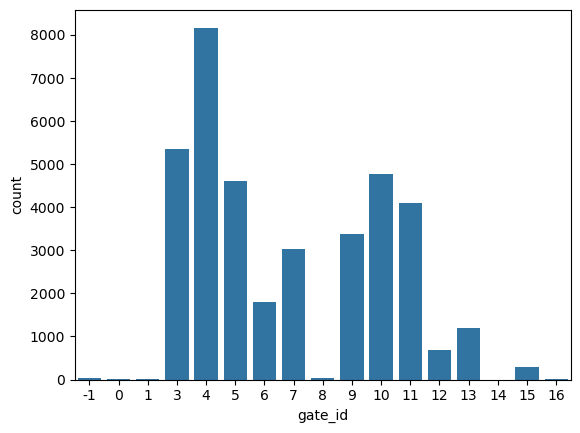

In [12]:
## Как часто используются ворота

sns.countplot(data=train_df, x='gate_id')

<Axes: xlabel='user_id', ylabel='count'>

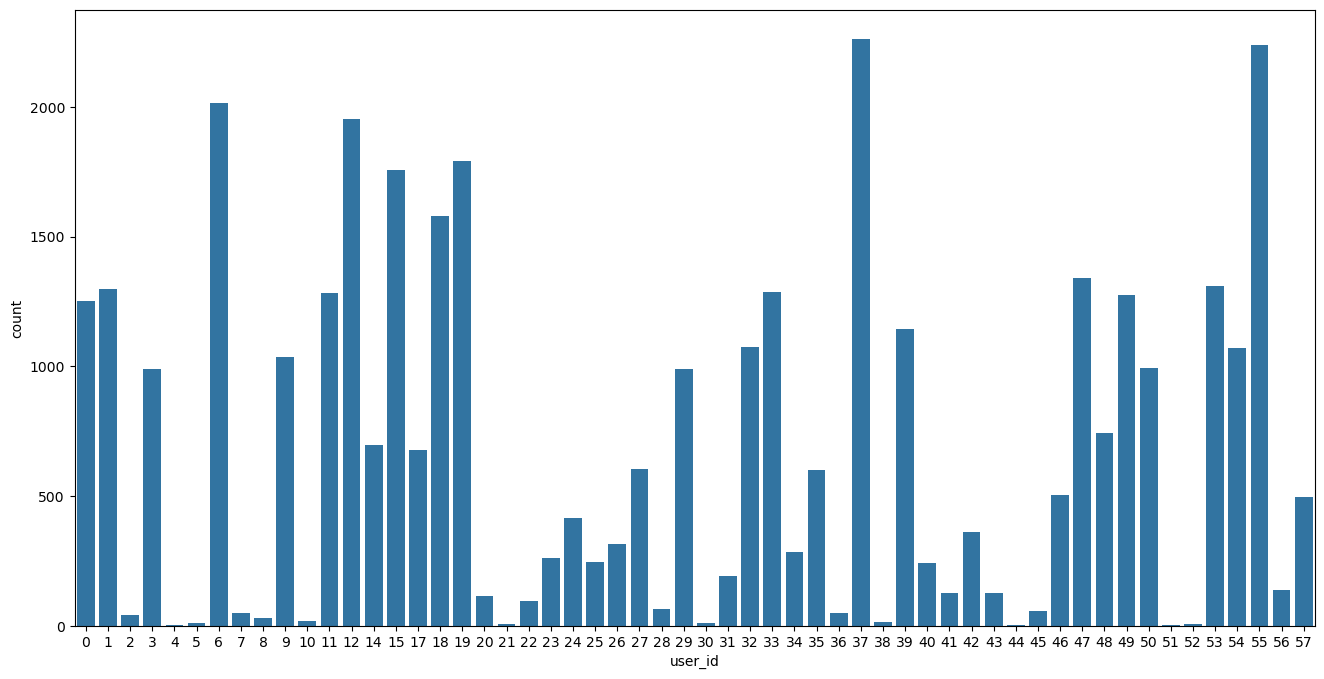

In [14]:
## Сколько информации о каждом пользователе

plt.figure(figsize=(16,8))
sns.countplot(data=train_df, x='user_id')

In [16]:
sorted(train_df['gate_id'].unique())

[-1, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [18]:
test_df.head()

,Unnamed: 0,ts,gate_id,user_word
0,37518,2023-01-03 08:21:00,9,gini
1,37519,2023-01-03 08:21:00,9,gini
2,37520,2023-01-03 08:21:18,5,gini
3,37521,2023-01-03 08:21:19,5,gini
4,37522,2023-01-03 08:21:39,10,gini


In [20]:
## Тоже нет null значений

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7125 non-null   int64 
 1   ts          7125 non-null   object
 2   gate_id     7125 non-null   int64 
 3   user_word   7125 non-null   object
dtypes: int64(2), object(2)
memory usage: 222.8+ KB


In [22]:
test_df['user_word'].nunique()

34

Кол-во уникальных юзеров не совпадает, следовательно некоторые юзеры из train больше не проходят через эти ворота. Также некоторые пользователи могут быть новыми. Нужно будет их отыскать

In [25]:
sorted(test_df['gate_id'].unique())

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Ворота не совпадают, поэтому нужно будет добавить отсутствующие вручную

Разобъем train_df на X и y

In [29]:
X = train_df.drop(['user_id', 'Unnamed: 0'], axis=1)
y = train_df['user_id']

Признаки, которые я планирую извлечь из 'ts':

1. Рабочий ли день
2. День недели
3. Время в часах
4. Время в минутах
5. Время в секундах

In [32]:
## переведем признак в datetime

X['ts'] = pd.to_datetime(X['ts'])

In [34]:
X = pd.concat([X, pd.get_dummies(X['ts'].dt.day_name())], axis=1)

In [36]:
X

,ts,gate_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2022-07-29 09:08:54,7,True,False,False,False,False,False,False
1,2022-07-29 09:09:54,9,True,False,False,False,False,False,False
2,2022-07-29 09:09:54,9,True,False,False,False,False,False,False
3,2022-07-29 09:10:06,5,True,False,False,False,False,False,False
4,2022-07-29 09:10:08,5,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
37513,2022-12-31 20:38:56,11,False,False,True,False,False,False,False
37514,2022-12-31 20:39:22,6,False,False,True,False,False,False,False
37515,2022-12-31 20:39:23,6,False,False,True,False,False,False,False
37516,2022-12-31 20:39:31,9,False,False,True,False,False,False,False


In [38]:
X['hours'] = X['ts'].dt.hour
X['minutes'] = X['ts'].dt.minute
X['seconds'] = X['ts'].dt.second

In [40]:
X

,ts,gate_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hours,minutes,seconds
0,2022-07-29 09:08:54,7,True,False,False,False,False,False,False,9,8,54
1,2022-07-29 09:09:54,9,True,False,False,False,False,False,False,9,9,54
2,2022-07-29 09:09:54,9,True,False,False,False,False,False,False,9,9,54
3,2022-07-29 09:10:06,5,True,False,False,False,False,False,False,9,10,6
4,2022-07-29 09:10:08,5,True,False,False,False,False,False,False,9,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...
37513,2022-12-31 20:38:56,11,False,False,True,False,False,False,False,20,38,56
37514,2022-12-31 20:39:22,6,False,False,True,False,False,False,False,20,39,22
37515,2022-12-31 20:39:23,6,False,False,True,False,False,False,False,20,39,23
37516,2022-12-31 20:39:31,9,False,False,True,False,False,False,False,20,39,31


In [42]:
## Определим рабочий ли день по условию

X['Chill_day'] = (X['Saturday'] == True) | (X['Sunday'] == True)

In [44]:
X

,ts,gate_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hours,minutes,seconds,Chill_day
0,2022-07-29 09:08:54,7,True,False,False,False,False,False,False,9,8,54,False
1,2022-07-29 09:09:54,9,True,False,False,False,False,False,False,9,9,54,False
2,2022-07-29 09:09:54,9,True,False,False,False,False,False,False,9,9,54,False
3,2022-07-29 09:10:06,5,True,False,False,False,False,False,False,9,10,6,False
4,2022-07-29 09:10:08,5,True,False,False,False,False,False,False,9,10,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,2022-12-31 20:38:56,11,False,False,True,False,False,False,False,20,38,56,True
37514,2022-12-31 20:39:22,6,False,False,True,False,False,False,False,20,39,22,True
37515,2022-12-31 20:39:23,6,False,False,True,False,False,False,False,20,39,23,True
37516,2022-12-31 20:39:31,9,False,False,True,False,False,False,False,20,39,31,True


In [46]:
X = pd.get_dummies(X, columns=['gate_id'])

In [48]:
X['gate_id_2'] = False

In [50]:
X = X.drop('ts', axis=1)

In [52]:
X = X.reindex(sorted(X.columns), axis=1)

In [54]:
## Наш готовый датасет

X

,Chill_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,gate_id_-1,gate_id_0,...,gate_id_3,gate_id_4,gate_id_5,gate_id_6,gate_id_7,gate_id_8,gate_id_9,hours,minutes,seconds
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,9,8,54
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,9,9,54
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,9,9,54
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,9,10,6
4,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,9,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,20,38,56
37514,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,20,39,22
37515,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,20,39,23
37516,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,20,39,31


In [56]:
y

0        18
1        18
2        18
3        18
4        18
         ..
37513     6
37514     6
37515     6
37516     6
37517     6
Name: user_id, Length: 37518, dtype: int64

Теперь проведем ту же работу со вторым датасетом

In [59]:
test_df = pd.read_csv('test.csv')

In [61]:
test_df = test_df.drop('Unnamed: 0', axis=1)

In [63]:
test_df

,ts,gate_id,user_word
0,2023-01-03 08:21:00,9,gini
1,2023-01-03 08:21:00,9,gini
2,2023-01-03 08:21:18,5,gini
3,2023-01-03 08:21:19,5,gini
4,2023-01-03 08:21:39,10,gini
...,...,...,...
7120,2023-02-24 19:43:36,11,collinear
7121,2023-02-24 19:44:00,4,collinear
7122,2023-02-24 19:44:01,4,collinear
7123,2023-02-24 19:44:09,9,collinear


In [65]:
X_test_df = test_df.drop('user_word', axis=1)

In [67]:
y_test_df = test_df['user_word']

In [69]:
X_test_df['ts'] = pd.to_datetime(X_test_df['ts'])
X_test_df = pd.concat([X_test_df, pd.get_dummies(X_test_df['ts'].dt.day_name())], axis=1)
X_test_df['hours'] = X_test_df['ts'].dt.hour
X_test_df['minutes'] = X_test_df['ts'].dt.minute
X_test_df['seconds'] = X_test_df['ts'].dt.second
X_test_df['Chill_day'] = (X_test_df['Saturday'] == True) | (X_test_df['Sunday'] == True)
X_test_df = pd.get_dummies(X_test_df, columns=['gate_id'])
X_test_df['gate_id_0'] = False
X_test_df['gate_id_16'] = False
X_test_df = X_test_df.drop('ts', axis=1)
X_test_df = X_test_df.reindex(sorted(X_test_df.columns), axis=1)

In [71]:
X_test_df

,Chill_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,gate_id_-1,gate_id_0,...,gate_id_3,gate_id_4,gate_id_5,gate_id_6,gate_id_7,gate_id_8,gate_id_9,hours,minutes,seconds
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,8,21,0
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,8,21,0
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,8,21,18
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,8,21,19
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,8,21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,19,43,36
7121,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,19,44,0
7122,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,19,44,1
7123,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,19,44,9


Теперь будем работать с первым датасетом. Во-первых, разобъем данные в нем на тестовый и обучающий наборы (в будущем будем использовать кросс-валидацию для поиска гиперпараметров, поэтому тестовый набор сделаем 0.15)

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Сделаем нормализацию значений, так как будем использовать не только деревья решений и основанные на них методы

In [79]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Выбираем модели
1. Логистическая регрессия

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [86]:
log_model = LogisticRegression(max_iter=5000)

In [88]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,10)
C = np.linspace(0,10,10)

param_grid = {'penalty': penalty,
             'l1_ratio': l1_ratio,
             'C': C}

In [90]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [92]:
grid_model.fit(scaled_X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [94]:
grid_model.best_params_

{'C': 5.555555555555555, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [96]:
test_predictions = grid_model.predict(scaled_X_test)

In [98]:
## Создадим датафрейм для анализа кол-ва правильно предсказанных значений

res_df = pd.concat([pd.DataFrame(data=y_test.reset_index()), pd.DataFrame(data=test_predictions)], axis=1).drop('index', axis=1)
res_df.columns = pd.Index(['y_test', 'test_preds'])
## сравнение настоящих и предсказанных значений (сколько совпало)
np.sum(res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0])['test_preds'] ==\
res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0]).index)

6

In [100]:
## Также создадим матрицу ошибок

from sklearn.metrics import confusion_matrix

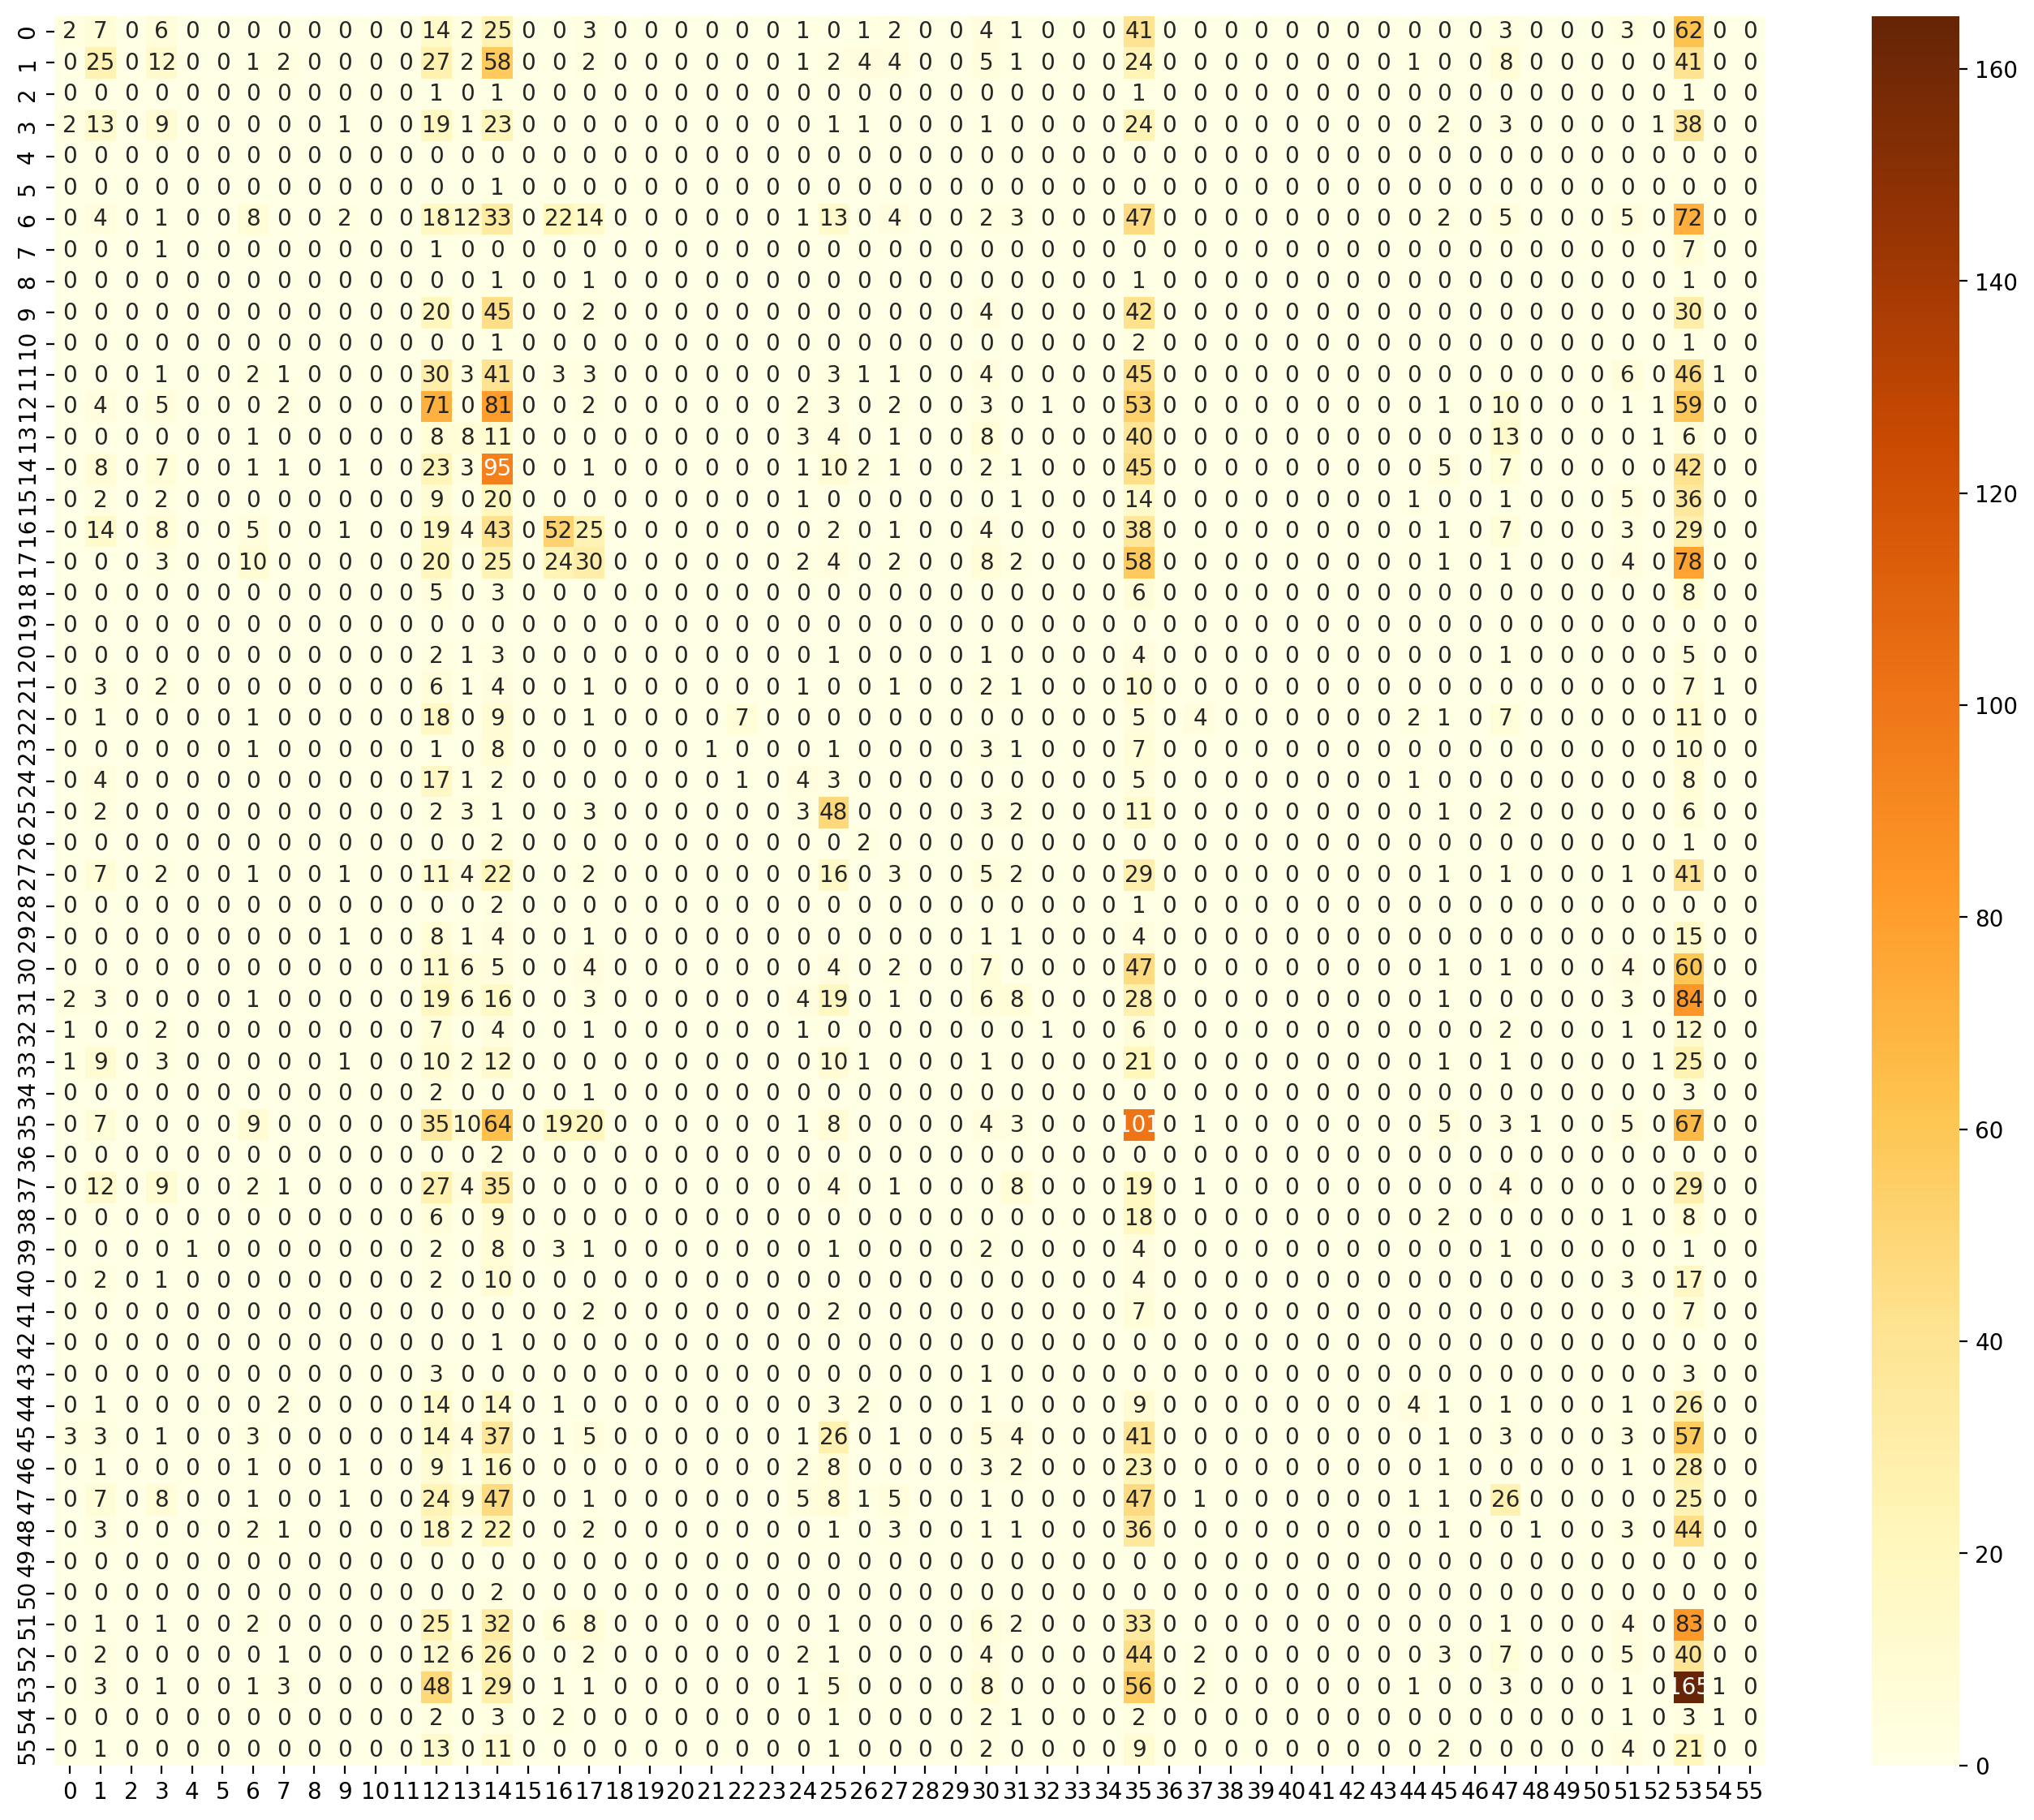

In [102]:
plt.figure(figsize=(17, 14), dpi=200)
sns.heatmap(confusion_matrix(y_test, test_predictions, labels=grid_model.classes_), annot=True, cmap='YlOrBr', fmt='');

Создадим функцию, чтобы не переписывать постоянно код

In [105]:
def model_results(model, param_grid, scaled_X_train, scaled_X_test, y_train, y_test):
    grid_model = GridSearchCV(model, param_grid=param_grid)
    grid_model.fit(scaled_X_train, y_train)

    print(f'Параметры модели: {grid_model.best_params_}')
    test_predictions = grid_model.predict(scaled_X_test)

    res_df = pd.concat([pd.DataFrame(data=y_test.reset_index()), pd.DataFrame(data=test_predictions)], axis=1).drop('index', axis=1)
    res_df.columns = pd.Index(['y_test', 'test_preds'])

    ## сколько значений совпало
    number = np.sum(res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0])['test_preds'] ==\
    res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0]).index)
    print(f'Правильно определено {number} человек')
    print(f'В процентах {np.round(number / 53 * 100, 2)}%')

    plt.figure(figsize=(17, 14), dpi=200)
    sns.heatmap(confusion_matrix(y_test, test_predictions, labels=grid_model.classes_), annot=True, cmap='YlOrBr', fmt='');

2. KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 10)}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Параметры модели: {'n_neighbors': 1}
Правильно определено 49 человек
В процентах 92.45%


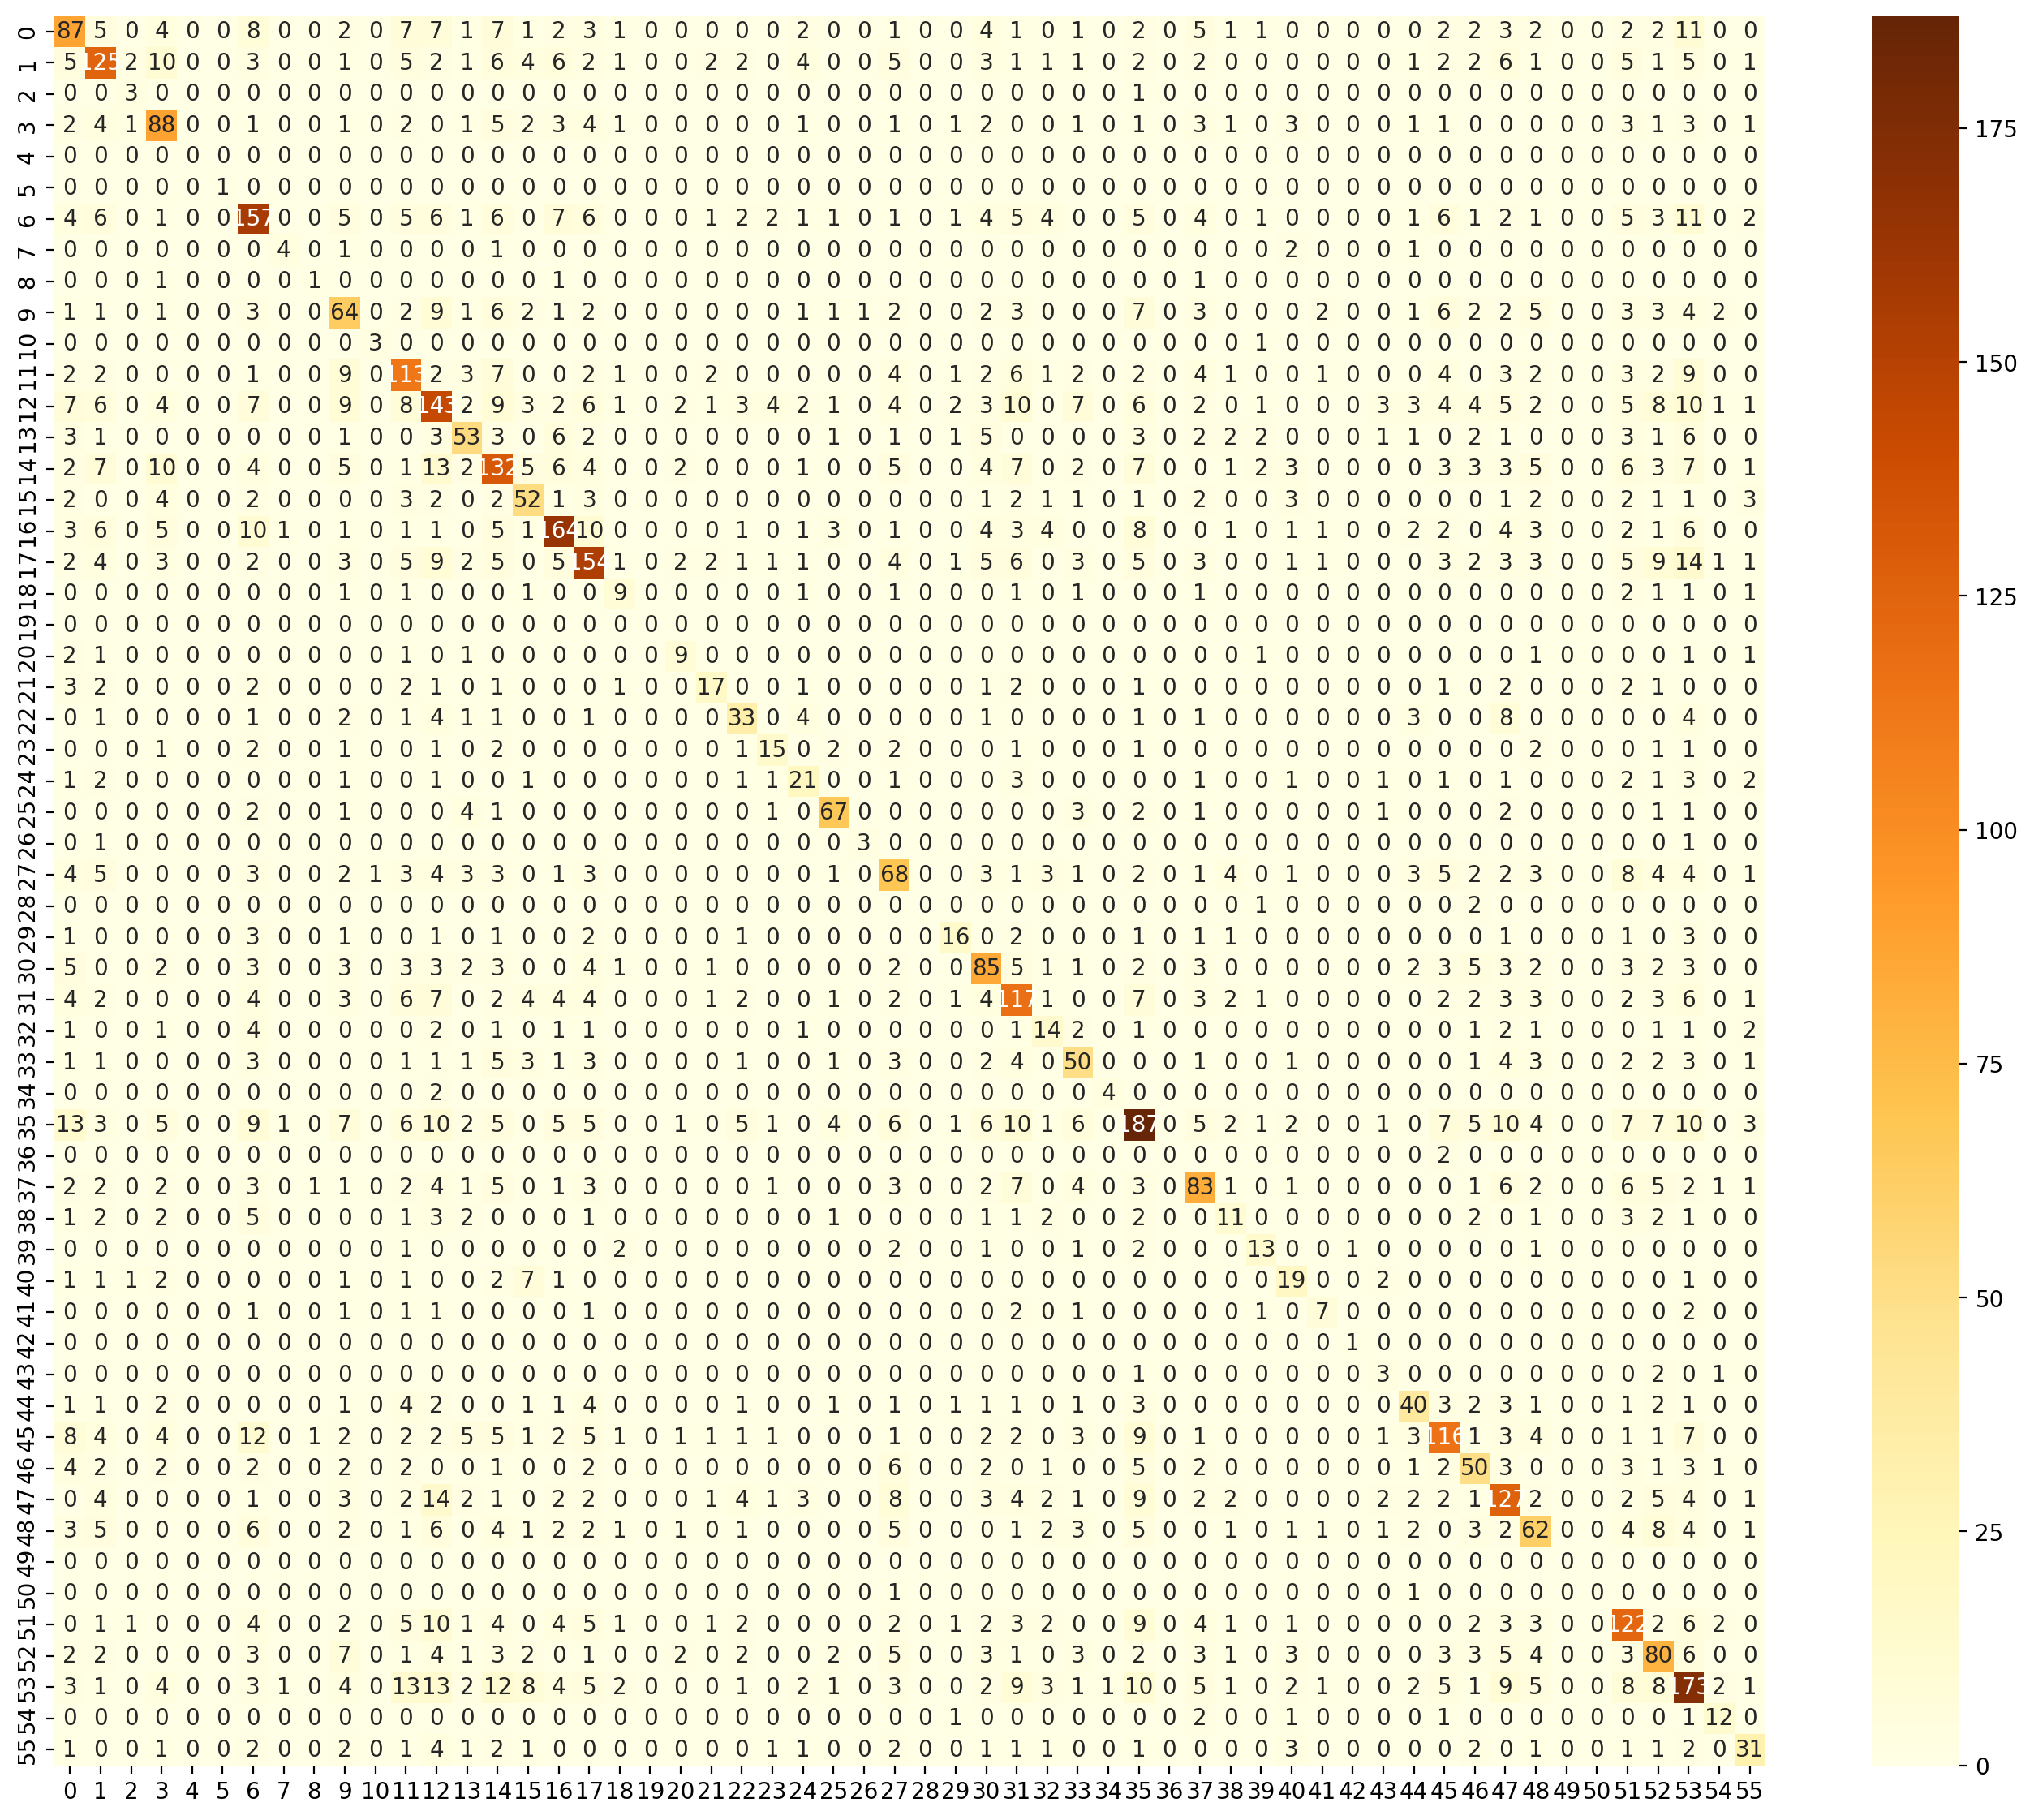

In [112]:
model_results(knn_model, param_grid, scaled_X_train, scaled_X_test, y_train, y_test)

Посмотрим сколько уникальных значений получится на втором наборе

In [115]:
scaled_X_test_df = scaler.transform(X_test_df)
scaled_X = scaler.transform(X)

In [117]:
def check_nunique(model, scaled_X_test_df, y_test_df, scaled_X, y):
    model.fit(scaled_X, y)
    test_predictions = model.predict(scaled_X_test_df)
    answer = pd.DataFrame(test_predictions, index=y_test_df)
    answer = answer.groupby('user_word').agg(lambda x: x.value_counts().index[0])
    answer.columns = ['preds']
    print(answer['preds'].nunique())
    return answer

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [121]:
answer = check_nunique(knn_model, scaled_X_test_df, y_test_df, scaled_X, y)

16


In [123]:
answer

,preds
user_word,
aucroc,49
binary,12
blue,40
categorical,14
coefficient,15
collinear,15
distributed,0
epsilon,12
f1,37


3. Деревья решений

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': range(1,60),
              'max_features': range(1,30)}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Параметры модели: {'max_depth': 39, 'max_features': 25}
Правильно определено 49 человек
В процентах 92.45%


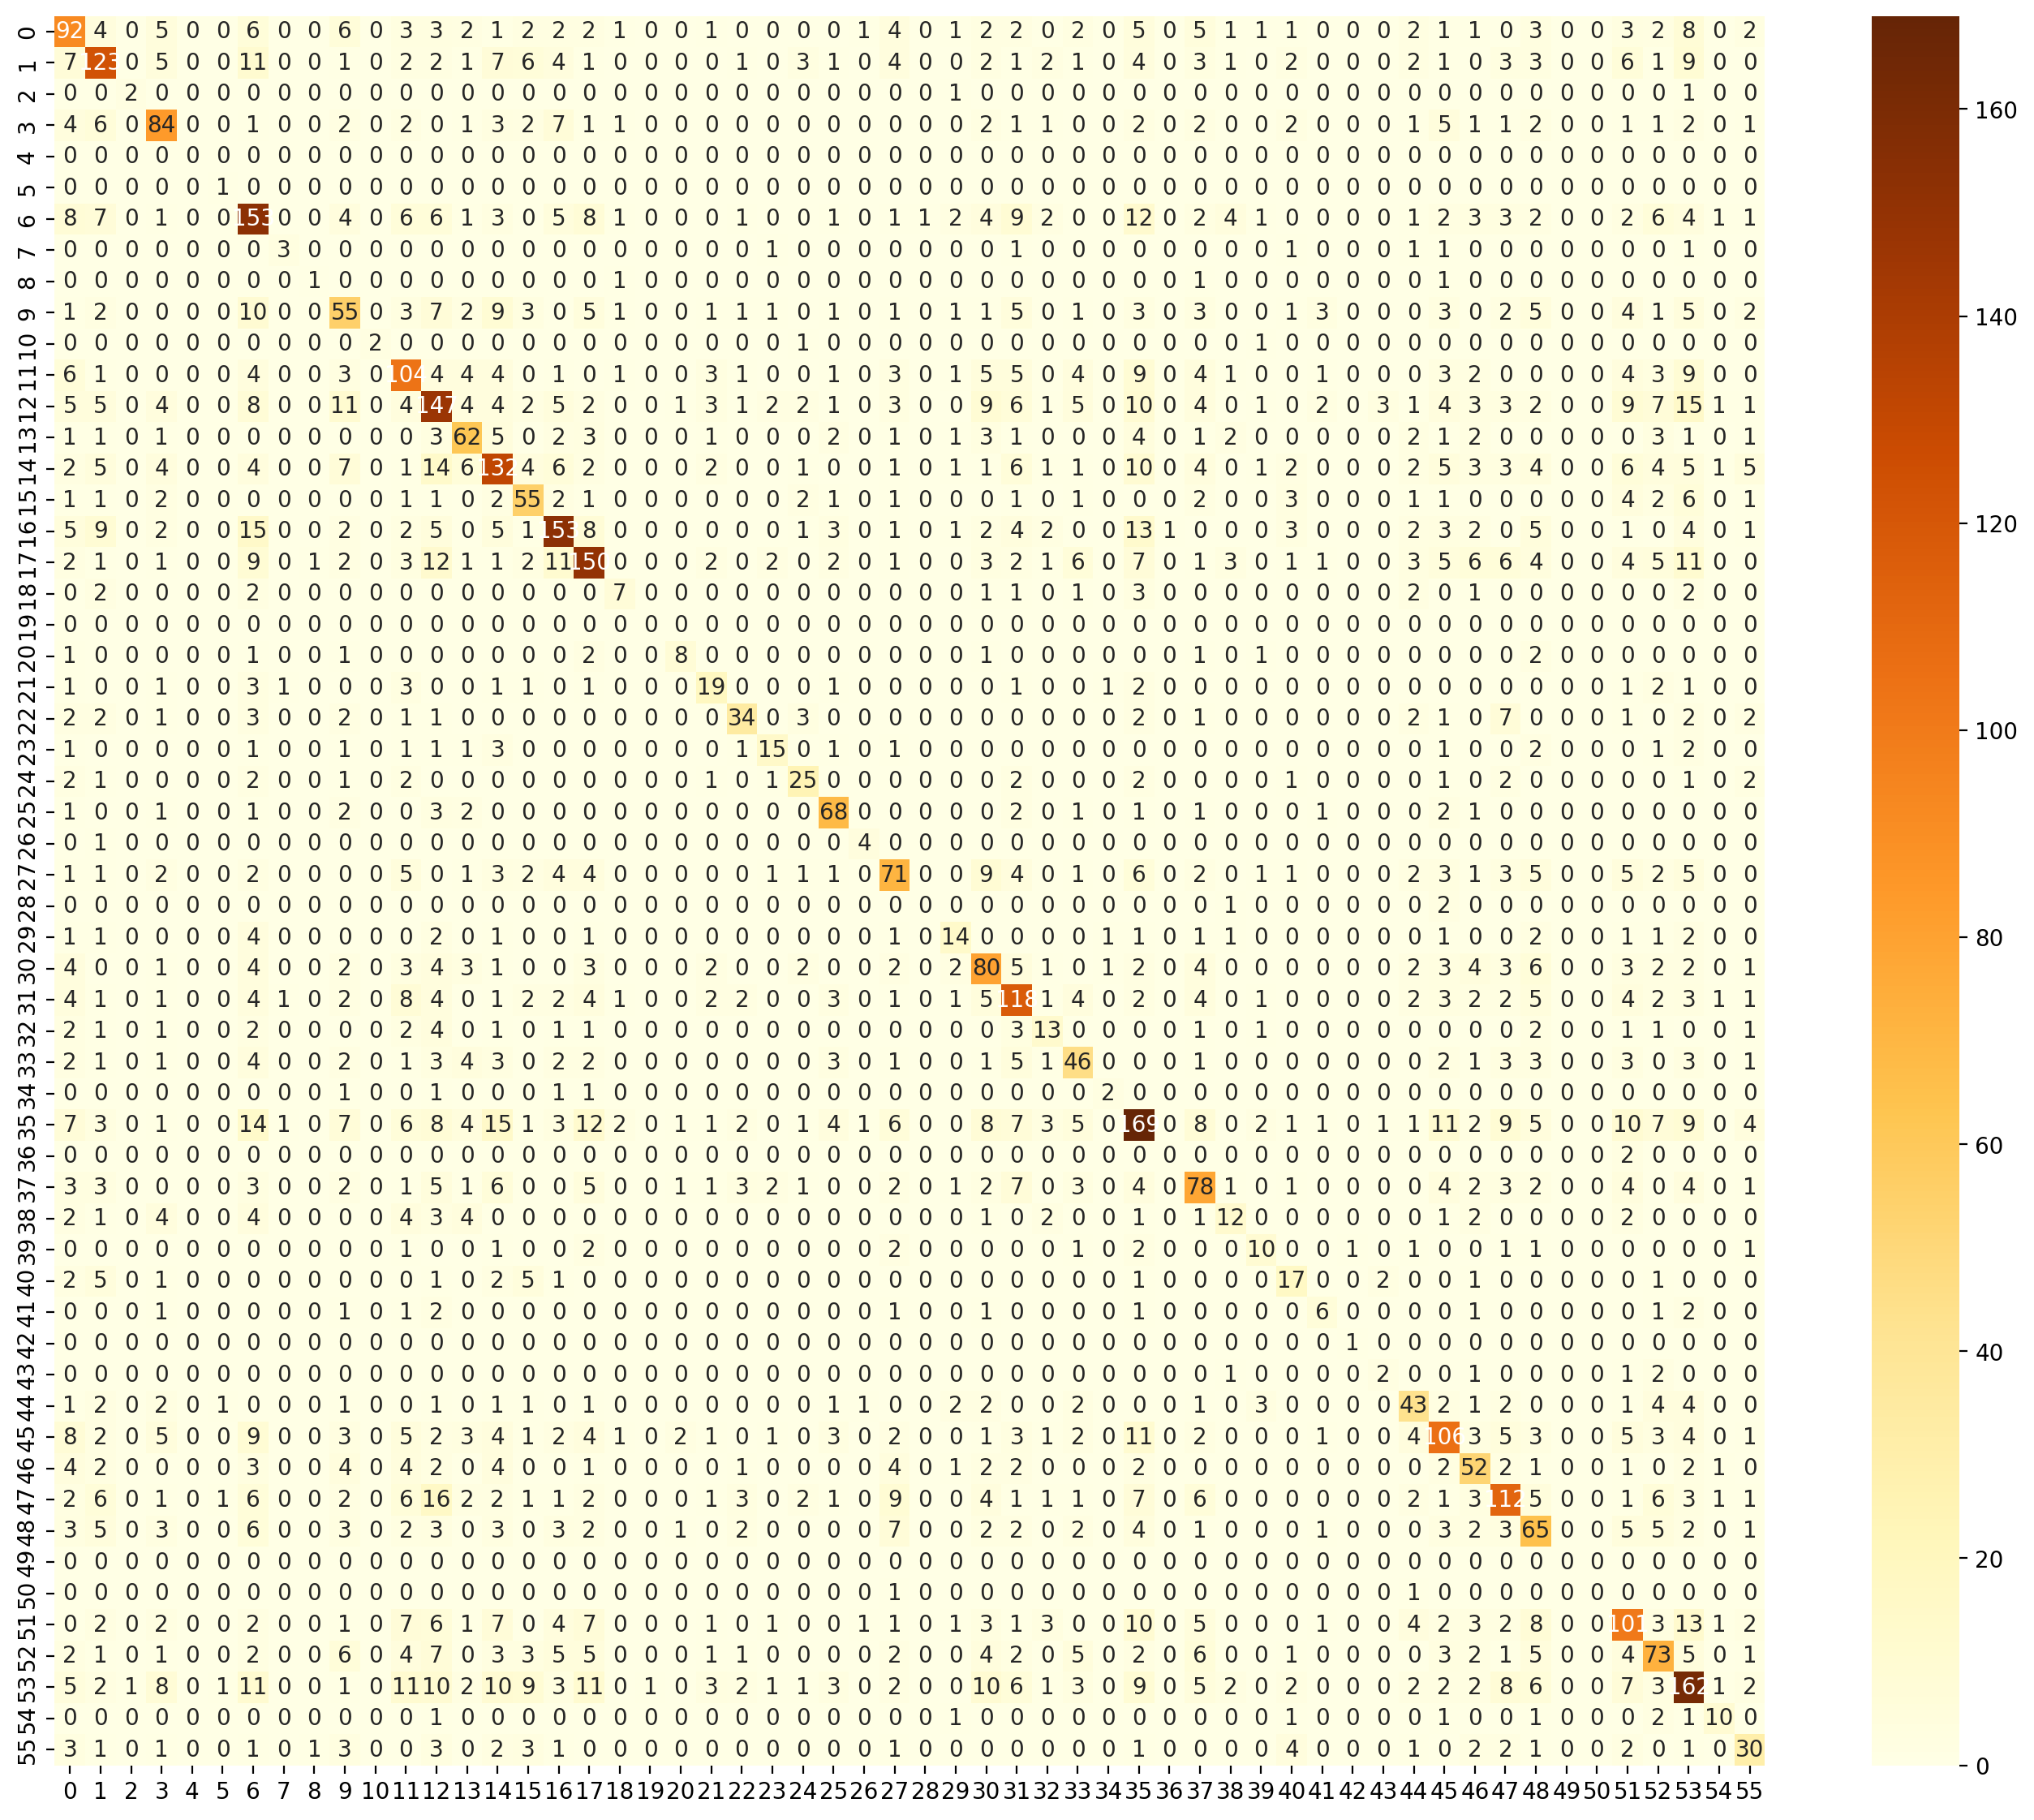

In [132]:
model_results(model, param_grid, scaled_X_train, scaled_X_test, y_train, y_test)

In [134]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=39, max_features=25)
answer = check_nunique(tree_model, scaled_X_test_df, y_test_df, scaled_X, y)

18


In [136]:
answer

,preds
user_word,
aucroc,12
binary,12
blue,33
categorical,14
coefficient,15
collinear,6
distributed,55
epsilon,1
f1,6


4. Случайный лес

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [64, 100, 128],
              'max_features': [5, 6, 7, 8]}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Параметры модели: {'max_features': 8, 'n_estimators': 128}
Правильно определено 49 человек
В процентах 92.45%


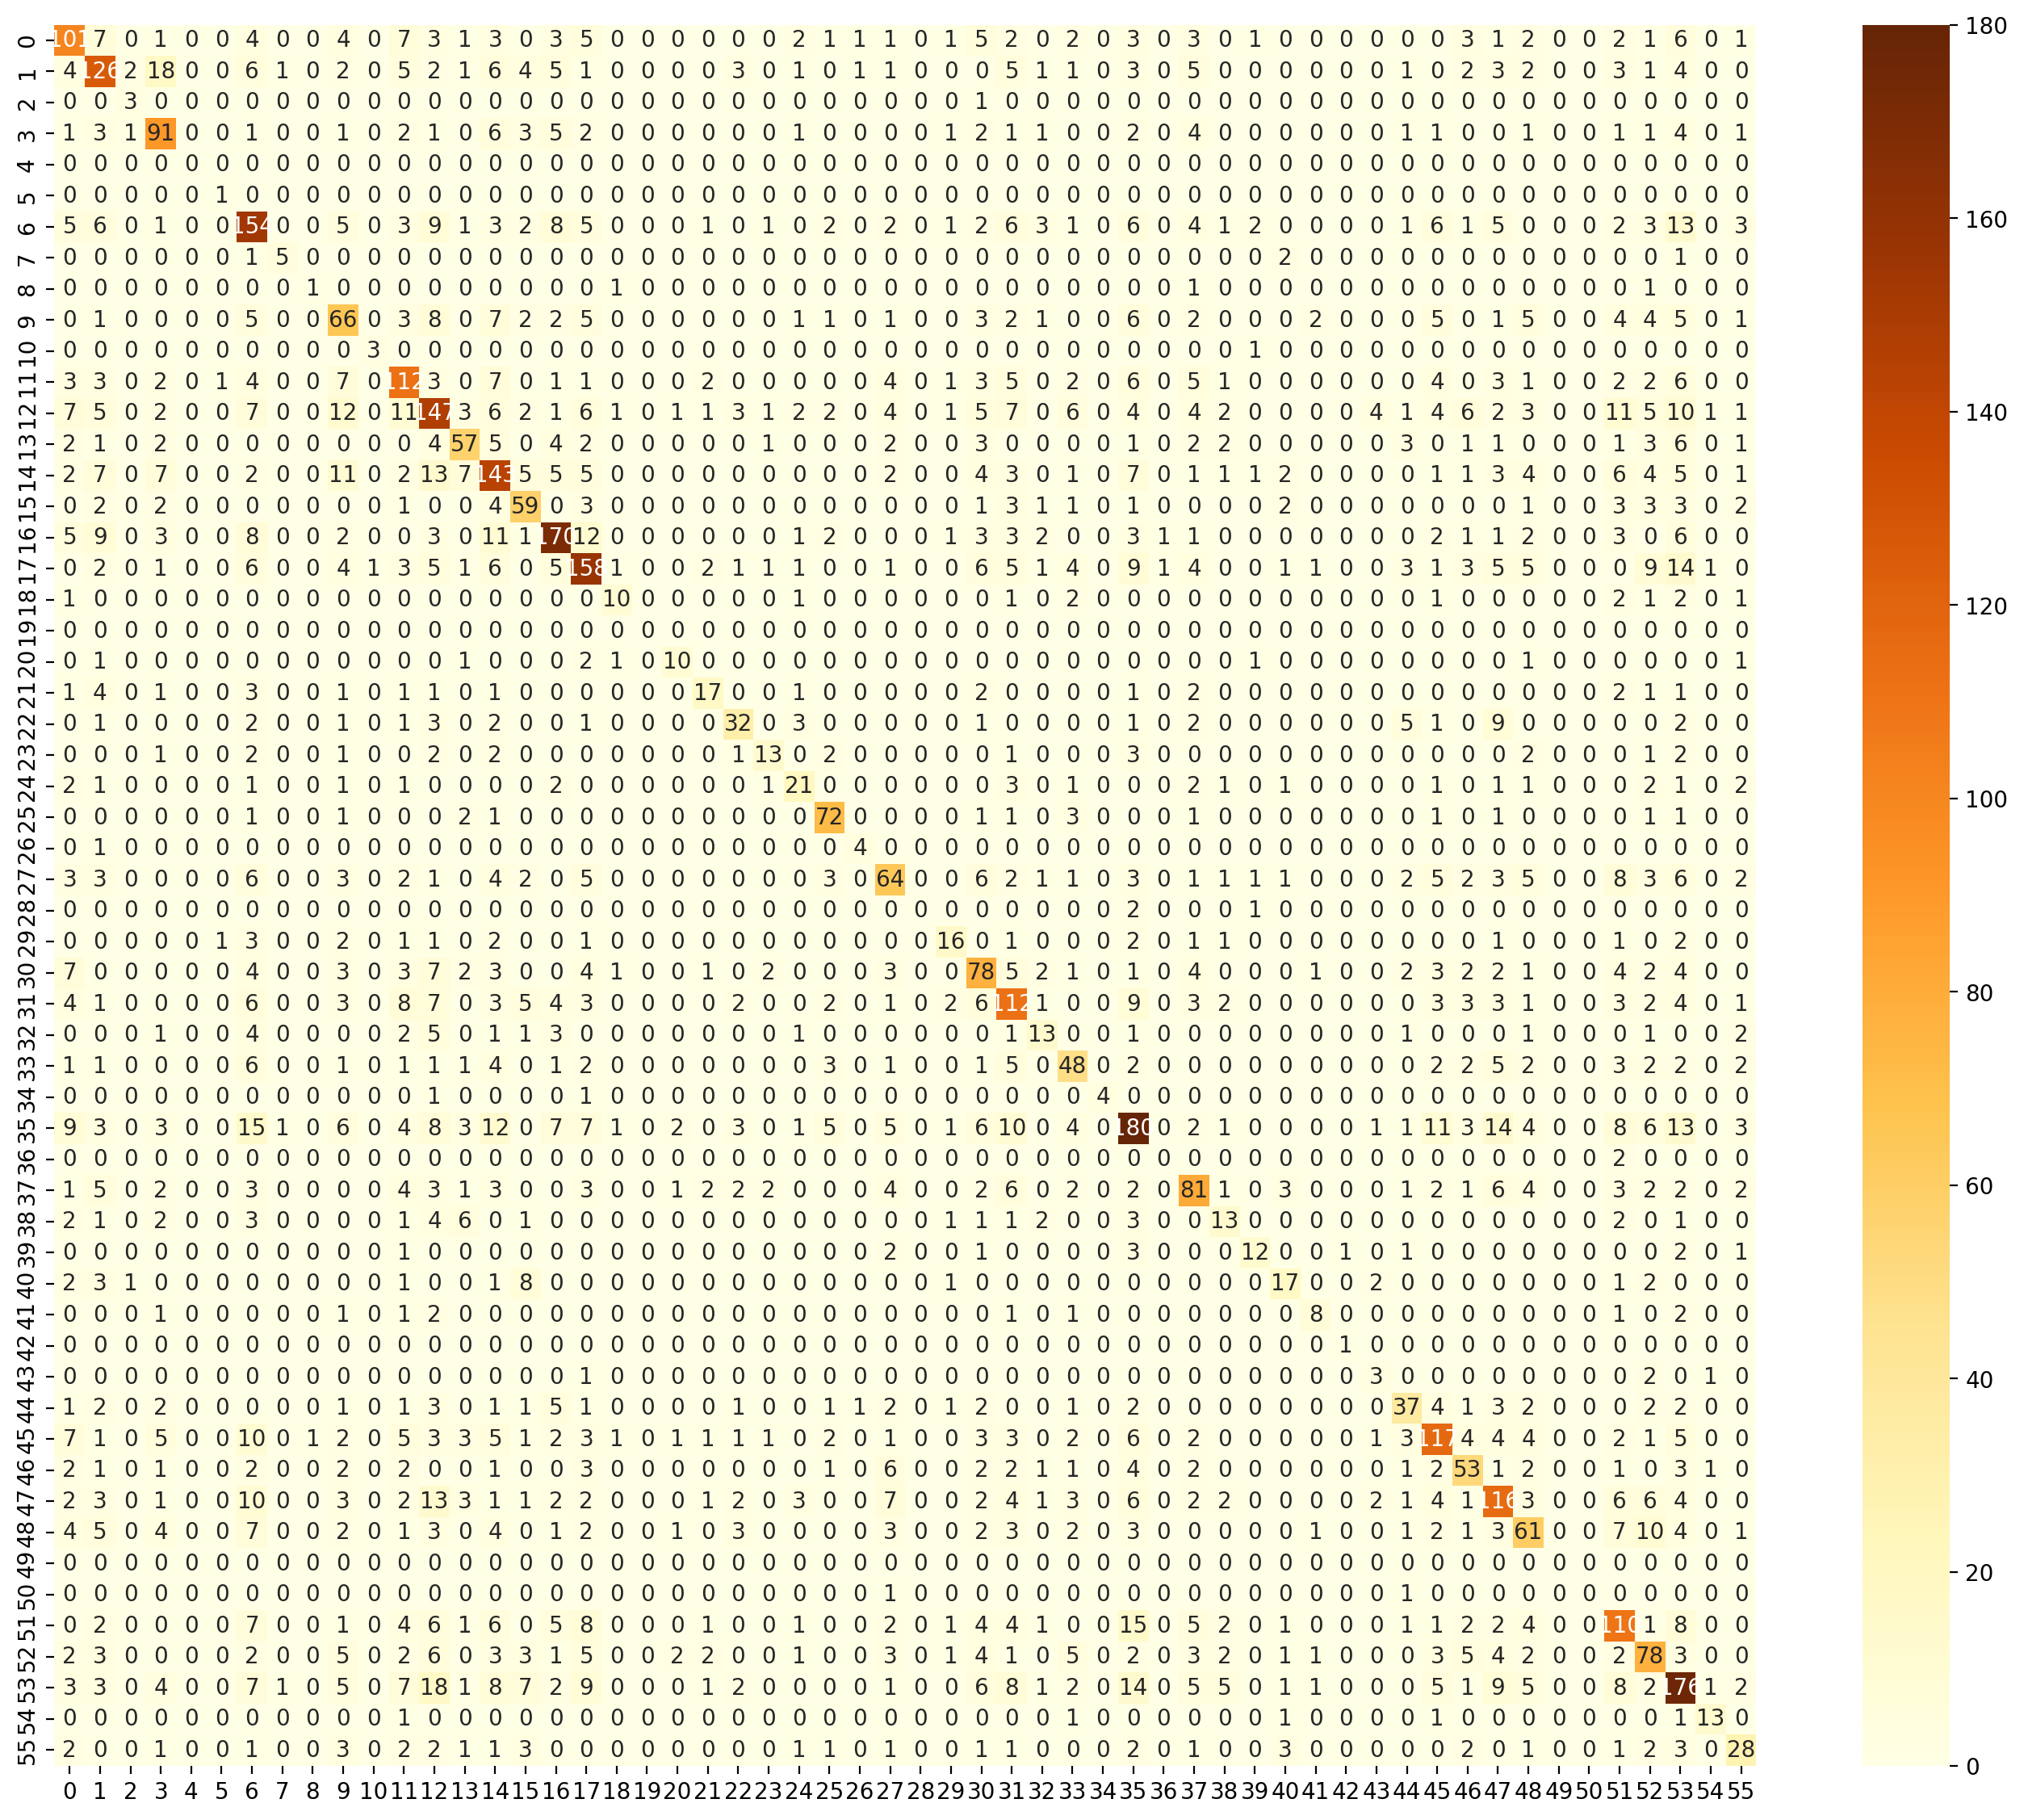

In [142]:
model_results(rfc_model, param_grid, scaled_X_train, scaled_X_test, y_train, y_test)

In [144]:
rfc_model = RandomForestClassifier(random_state=42, n_estimators=128, max_features=8)
answer = check_nunique(rfc_model, scaled_X_test_df, y_test_df, scaled_X, y)

19


In [146]:
answer

,preds
user_word,
aucroc,55
binary,12
blue,18
categorical,14
coefficient,15
collinear,55
distributed,0
epsilon,1
f1,6


5. CatBoost

In [148]:
from catboost import CatBoostClassifier

В силу того, что данная модель машинного обучения очень требовательная к ресурсам, было принято решение сначала определить подходящую глубину (начиная с 6 дошел до 12, на переходе с 11 до 12 было слишком незаметное улучшение модели, из-за чего я решил оставить глубину = 11). Также на момент подбора глубины количество итераций было выставлено на 100, чтобы ускорить процесс. Далее я повышал количество итераций (200, 300, 400), и снова не увидел заметного улучшения при переходе с 300 до 400 итераций, остановился на 300. Далее я начал подбирать скорость обучения, начиная с 1 и уменьшая на 0.01. Дошел до скорости обучения 0.7, и отобрал наилучшие на мой взгяд параметры скорости обучения. Основывался я на количестве уникальных значений во втором датасете, так как логично, что их количество должно быть больше, чтобы была возможность дать как можно больше правильных ответов. Также я смотрел на правильность в train_df, для того чтобы модель предсказывала не только большое количество различных человек, но и достаточно правильно их предсказывала. По итогу у меня получились следующие лучшие результаты:

In [152]:
model = CatBoostClassifier(iterations=300, learning_rate=0.92, max_depth=11, random_state=42)
model.fit(scaled_X, y)
test_predictions = model.predict(scaled_X_test_df)
answer = pd.DataFrame(test_predictions, index=y_test_df)
answer = answer.groupby('user_word').agg(lambda x: x.value_counts().index[0])
answer.columns = ['preds']
answer['preds'].nunique()

0:	learn: 3.4868522	total: 1.17s	remaining: 5m 50s
1:	learn: 3.2256129	total: 2.1s	remaining: 5m 12s
2:	learn: 3.0921923	total: 2.9s	remaining: 4m 47s
3:	learn: 2.9489569	total: 3.69s	remaining: 4m 33s
4:	learn: 2.8781004	total: 4.45s	remaining: 4m 22s
5:	learn: 2.8105907	total: 5.17s	remaining: 4m 13s
6:	learn: 2.7297489	total: 5.91s	remaining: 4m 7s
7:	learn: 2.6548018	total: 6.71s	remaining: 4m 5s
8:	learn: 2.6045243	total: 7.49s	remaining: 4m 2s
9:	learn: 2.5494864	total: 8.19s	remaining: 3m 57s
10:	learn: 2.4734866	total: 8.86s	remaining: 3m 52s
11:	learn: 2.4100558	total: 9.52s	remaining: 3m 48s
12:	learn: 2.3695782	total: 10.2s	remaining: 3m 45s
13:	learn: 2.3167922	total: 10.9s	remaining: 3m 42s
14:	learn: 2.2907185	total: 11.5s	remaining: 3m 38s
15:	learn: 2.2530284	total: 12s	remaining: 3m 33s
16:	learn: 2.2159638	total: 12.6s	remaining: 3m 29s
17:	learn: 2.1768013	total: 13.3s	remaining: 3m 28s
18:	learn: 2.1476085	total: 14.2s	remaining: 3m 29s
19:	learn: 2.1184052	total: 1

21

0:	learn: 3.4455813	total: 626ms	remaining: 3m 7s
1:	learn: 3.1929784	total: 1.14s	remaining: 2m 49s
2:	learn: 3.0572423	total: 1.64s	remaining: 2m 42s
3:	learn: 2.9551318	total: 2.94s	remaining: 3m 37s
4:	learn: 2.8599318	total: 3.4s	remaining: 3m 20s
5:	learn: 2.7839070	total: 3.74s	remaining: 3m 3s
6:	learn: 2.7179035	total: 4.14s	remaining: 2m 53s
7:	learn: 2.6525867	total: 4.52s	remaining: 2m 45s
8:	learn: 2.5964015	total: 4.96s	remaining: 2m 40s
9:	learn: 2.5322038	total: 5.3s	remaining: 2m 33s
10:	learn: 2.4853474	total: 5.67s	remaining: 2m 28s
11:	learn: 2.4508172	total: 6.09s	remaining: 2m 26s
12:	learn: 2.4151438	total: 6.48s	remaining: 2m 23s
13:	learn: 2.3618092	total: 6.86s	remaining: 2m 20s
14:	learn: 2.3313969	total: 7.52s	remaining: 2m 22s
15:	learn: 2.2885084	total: 8.05s	remaining: 2m 22s
16:	learn: 2.2412589	total: 8.47s	remaining: 2m 20s
17:	learn: 2.2010371	total: 8.91s	remaining: 2m 19s
18:	learn: 2.1677312	total: 9.3s	remaining: 2m 17s
19:	learn: 2.1223111	total:

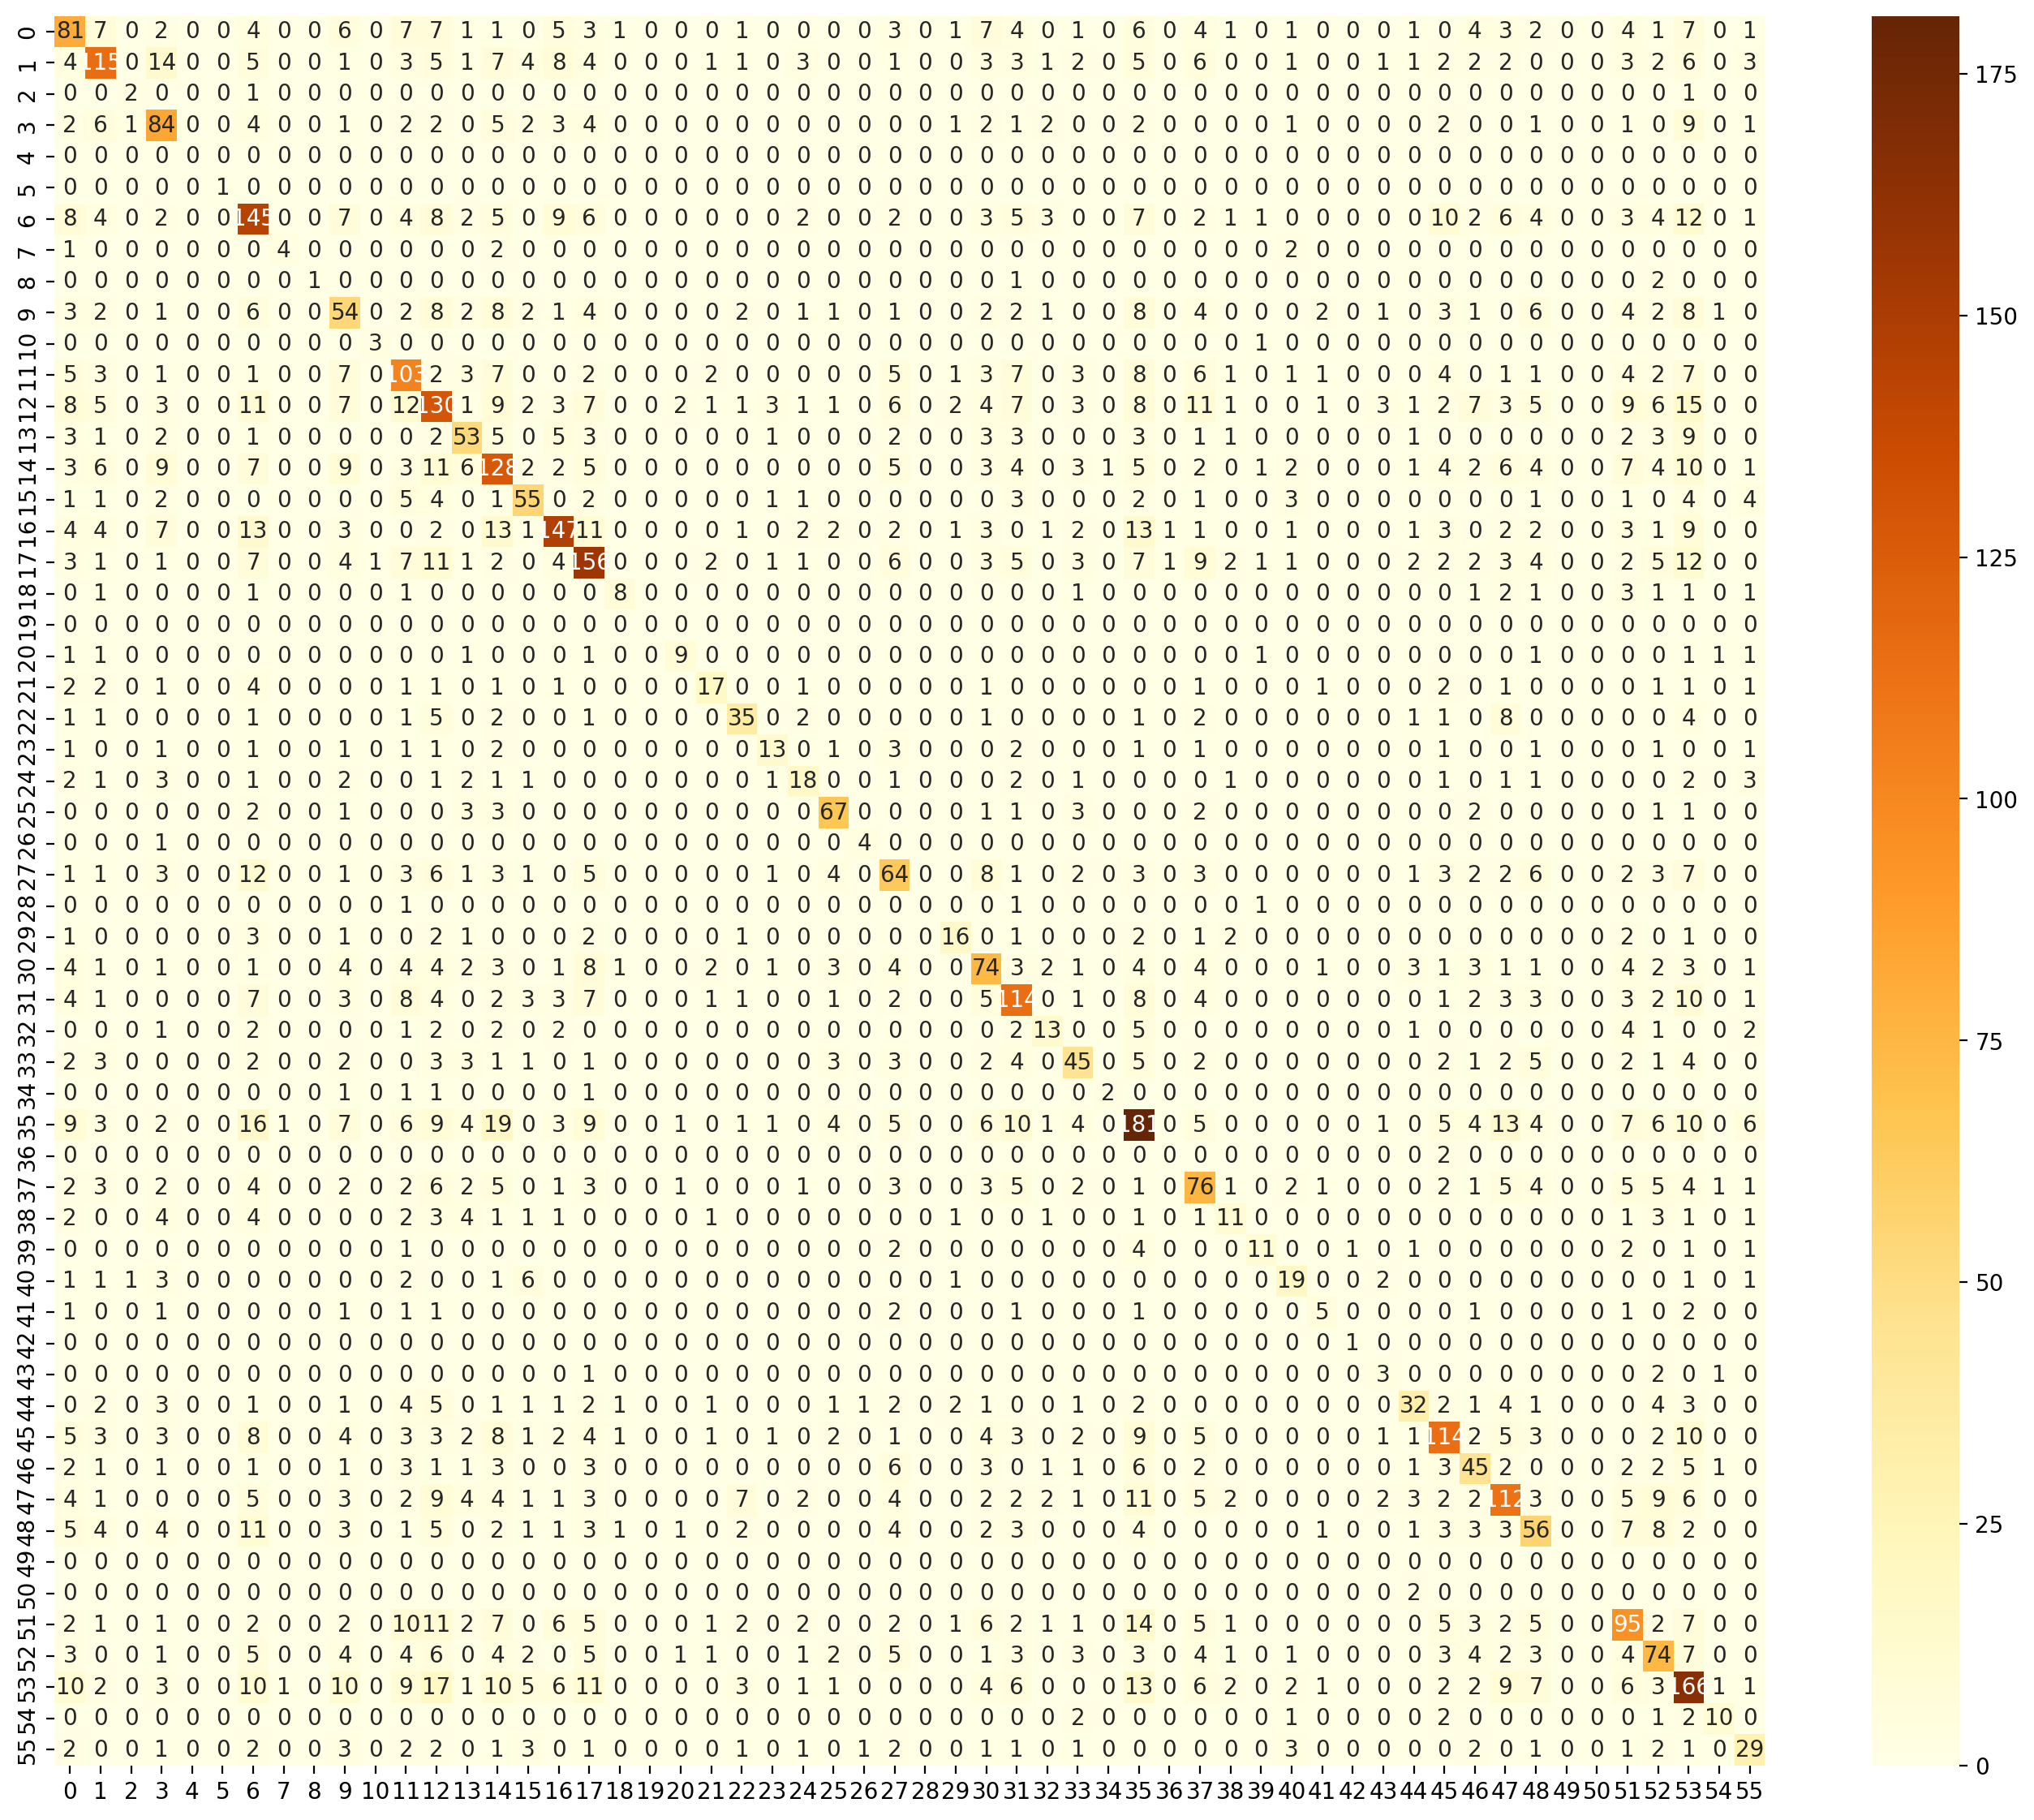

In [154]:
model.fit(scaled_X_train, y_train)

test_predictions = model.predict(scaled_X_test)

res_df = pd.concat([pd.DataFrame(data=y_test.reset_index()), pd.DataFrame(data=test_predictions)], axis=1).drop('index', axis=1)
res_df.columns = pd.Index(['y_test', 'test_preds'])

## сколько значений совпало
number = np.sum(res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0])['test_preds'] ==\
res_df.groupby('y_test').agg(lambda x: x.value_counts().index[0]).index)
print(f'Правильно определено {number} человек')
print(f'В процентах {np.round(number / 53 * 100, 2)}%')

plt.figure(figsize=(17, 14), dpi=200)
sns.heatmap(confusion_matrix(y_test, test_predictions, labels=model.classes_), annot=True, cmap='YlOrBr', fmt='');

In [156]:
answer

,preds
user_word,
aucroc,49
binary,12
blue,53
categorical,14
coefficient,15
collinear,55
distributed,0
epsilon,1
f1,6


Теперь задача состоит в том, чтобы найти новых человек. Для этого посмотрим на test_df, и уделим особое внимание двум вещам:
1. Дате первого прохода через турникет
2. Количеству общих проходов через турникеты

In [163]:
test_df['ts'] = pd.to_datetime(test_df['ts'])

In [169]:
## Все прошли через турникет впервые в первом месяце

test_df.groupby('user_word')['ts'].agg(lambda x: sorted(x.to_list())[0]).dt.month

user_word
aucroc          1
binary          1
blue            1
categorical     1
coefficient     1
collinear       1
distributed     1
epsilon         1
f1              1
fit             1
gini            1
independent     1
lasso           1
linear          1
logistic        1
loss            1
matrix          1
minimization    1
mse             1
ols             1
precision       1
predict         1
pvalue          1
r2              1
recall          1
regression      1
residual        1
ridge           1
sigmoid         1
significant     1
target          1
tstat           1
x               1
y               1
Name: ts, dtype: int32

In [175]:
## Есть несколько человек, выбивающиеся из общей картины. Чтобы выбрать день, начиная с которого мы будем отделять новый класс, вспомним, что
## максимальное новое кол-во человек = 10% от train_df, что, при округлении, составляет 5-6 человек. Если мы выберем с 9 дня включительно, то 
## у нас получится 7 человек, что уже выходит за норму. Поэтому будем брать с 10 дня

test_df.groupby('user_word')['ts'].agg(lambda x: sorted(x.to_list())[0]).dt.day 

user_word
aucroc           4
binary           3
blue             3
categorical      3
coefficient     12
collinear        3
distributed      6
epsilon          3
f1               3
fit              3
gini             3
independent      4
lasso            3
linear           3
logistic         3
loss             3
matrix           5
minimization     3
mse              6
ols              3
precision       31
predict          3
pvalue           3
r2               9
recall           3
regression      27
residual         3
ridge            9
sigmoid          4
significant      3
target           3
tstat            9
x                5
y               27
Name: ts, dtype: int32

In [177]:
test_df.groupby('user_word')['ts'].agg(lambda x: sorted(x.to_list())[0]).dt.day > 9

user_word
aucroc          False
binary          False
blue            False
categorical     False
coefficient      True
collinear       False
distributed     False
epsilon         False
f1              False
fit             False
gini            False
independent     False
lasso           False
linear          False
logistic        False
loss            False
matrix          False
minimization    False
mse             False
ols             False
precision        True
predict         False
pvalue          False
r2              False
recall          False
regression       True
residual        False
ridge           False
sigmoid         False
significant     False
target          False
tstat           False
x               False
y                True
Name: ts, dtype: bool

In [179]:
answer.loc['coefficient'] = -999
answer.loc['precision'] = -999
answer.loc['regression'] = -999
answer.loc['y'] = -999

In [181]:
## Теперь посмотрим на кол-во проходов через турникеты. Явно выделяется logistic с всего 5 проходами. Скорее всего это тоже новый человек.

test_df.groupby('user_word')['ts'].count()

user_word
aucroc           41
binary          393
blue             12
categorical     259
coefficient      65
collinear       329
distributed     123
epsilon         371
f1              761
fit             193
gini            288
independent     311
lasso            34
linear          211
logistic          5
loss            497
matrix          166
minimization     99
mse             107
ols             145
precision        57
predict         228
pvalue          186
r2              212
recall          229
regression       53
residual        228
ridge           150
sigmoid         446
significant     292
target          116
tstat           143
x               318
y                57
Name: ts, dtype: int64

In [183]:
answer.loc['logistic'] = -999

In [187]:
## Вот мой итоговый ответ.

answer

,preds
user_word,
aucroc,49
binary,12
blue,53
categorical,14
coefficient,-999
collinear,55
distributed,0
epsilon,1
f1,6


In [189]:
answer.to_csv('answer.csv') 
! zip answer.zip answer.csv # Подготовка файла для отправки

updating: answer.csv (deflated 35%)
